Hunter Bennett | Glass Lab | Kupffer Strains Project | 14 March 2023

Notebook for heatmap partitioning of *trans* genes into cell extrinsic and cell intrinsic *trans* via comparison of F1 and NSG experiments.

### Import packages, set plotting parameters

In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
%matplotlib inline
### imports ###
import sys
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#### PLOTTING PARAMETERS FOR MANUSCRIPT ####
# # get matplotlib to save readable fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.size'] = 6
matplotlib.rcParams['savefig.dpi'] = 500


# line widths
matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['ytick.major.width'] = 1

# adjust defualt color for plots to black
# normal default is a dark gray
COLOR = 'black'
matplotlib.rcParams['text.color'] = COLOR
matplotlib.rcParams['axes.labelcolor'] = COLOR
matplotlib.rcParams['xtick.color'] = COLOR
matplotlib.rcParams['ytick.color'] = COLOR
matplotlib.rcParams['axes.edgecolor'] = COLOR

#### PLOT PARAMETERS FOR THIS PLOT ####

Set working directory

In [3]:
workingDirectory = '/home/h1bennet/strains_github/results/Figure4/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

Read in gene lists

In [4]:
f1_dict = {}
for genelist in glob.glob('./gene_lists/f1nsg*filt_pval.txt'):
    with open(genelist, 'r') as f:
        listid = genelist.split('/')[-1].replace('.txt','').replace('f1nsg_', '')
        f1_dict[listid] = [i.strip() for i in f.readlines()[1:]]

In [5]:
nsg_dict = {}
for genelist in glob.glob('./gene_lists/nsg*filt_pval.txt'):
    with open(genelist, 'r') as f:
        listid = genelist.split('/')[-1].replace('.txt','').replace('nsg_', '')
        nsg_dict[listid] = [i.strip() for i in f.readlines()[1:]]

Compare overlap of all sets...

In [6]:
for key in f1_dict.keys():
    print(key)
    print(len(f1_dict[key]), 'genes in F1-NSG set')
    print(len(nsg_dict[key]), 'genes in F0-NSG set')
    shared = set(nsg_dict[key]).intersection(f1_dict[key])
    total = set(nsg_dict[key]).union(f1_dict[key])
    print('%i / %i genes shared' % (len(shared), len(total)))

kupffer_trans_balb_filt_pval
58 genes in F1-NSG set
84 genes in F0-NSG set
31 / 111 genes shared
kupffer_mixed_c57_filt_pval
38 genes in F1-NSG set
17 genes in F0-NSG set
1 / 54 genes shared
kupffer_cis_balb_filt_pval
31 genes in F1-NSG set
77 genes in F0-NSG set
22 / 86 genes shared
kupffer_cis_c57_filt_pval
40 genes in F1-NSG set
73 genes in F0-NSG set
34 / 79 genes shared
kupffer_trans_c57_filt_pval
59 genes in F1-NSG set
89 genes in F0-NSG set
40 / 108 genes shared
kupffer_mixed_balb_filt_pval
29 genes in F1-NSG set
18 genes in F0-NSG set
2 / 45 genes shared


Read in differential expression analysis files from previous anlalyses - key here is these files contain DESeq2 estimated log2foldchange between strains/alleles

In [7]:
# F0
df_control = pd.read_csv('./balbcj_control.vs.c57bl6j_control.deseq.txt',
                         sep='\t', index_col=0)

# F1
df_f1 = pd.read_csv('./balbcj_f1nsg_variants.vs.c57bl6j_f1nsg_variants.deseq.txt',
                    sep='\t', index_col=0)

# NSG
df_nsg = pd.read_csv('./balbcj_NSG.vs.c57bl6j_NSG.deseq.txt',
                 sep='\t', index_col=0)

# Mege into master data frame
df = df_control.merge(df_f1.merge(df_nsg, left_index=True, right_index=True, how='inner', suffixes=('_f1','_nsg')),
                      left_index=True,
                      right_index=True,
                      how='inner',
                      suffixes=('_control', ''))

## Trans gene analysis

In [8]:
# set column labels
log2fc_cols = ['log2FoldChange',
             'log2FoldChange_nsg',
             'log2FoldChange_f1']

C57BL6/J plots  
Unlabeled

40
16
4


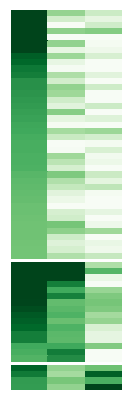

In [9]:
key = 'kupffer_trans_c57_filt_pval'
shared_set = df.reindex(set(nsg_dict[key]).intersection(f1_dict[key])).dropna().index.tolist()
f1_only = df.reindex(set(f1_dict[key]).difference(nsg_dict[key])).dropna().index.tolist()
nsg_only = df.reindex(set(nsg_dict[key]).difference(f1_dict[key])).dropna().index.tolist()

sets = [shared_set, f1_only, nsg_only]
set_lengths = [len(i) for i in sets]

f, axs = plt.subplots(3, 1, figsize=(2,7), gridspec_kw={'height_ratios': set_lengths})
plt.subplots_adjust(hspace=0.025)
for geneset, ax in zip(sets, axs):
    print(len(geneset))
    sns.heatmap(df.loc[geneset, log2fc_cols].sort_values('log2FoldChange', ascending=False),
                cmap='Greens',
                # linewidth=1,
                # linecolor='k',
                # z_score=2,
                vmin=0,
                vmax=2,
                # annot=True,
                fmt='.1f',
                xticklabels=0,
                yticklabels=0,
                cbar=False,
                cbar_kws={'orientation':'vertical',
                          'pad':0.05,
                          'label':'-log2fc'},
                ax=ax)

Labeled

40
16
4


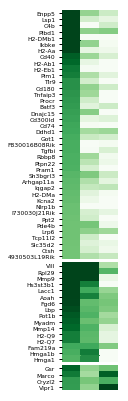

In [10]:
key = 'kupffer_trans_c57_filt_pval'
shared_set = df.reindex(set(nsg_dict[key]).intersection(f1_dict[key])).dropna().index.tolist()
f1_only = df.reindex(set(f1_dict[key]).difference(nsg_dict[key])).dropna().index.tolist()
nsg_only = df.reindex(set(nsg_dict[key]).difference(f1_dict[key])).dropna().index.tolist()

sets = [shared_set, f1_only, nsg_only]
set_lengths = [len(i) for i in sets]

f, axs = plt.subplots(3, 1, figsize=(1,7), gridspec_kw={'height_ratios': set_lengths})
plt.subplots_adjust(hspace=0.025)
for geneset, ax in zip(sets, axs):
    print(len(geneset))
    sns.heatmap(df.loc[geneset, log2fc_cols].sort_values('log2FoldChange', ascending=False),
                cmap='Greens',
                # linewidth=1,
                # linecolor='k',
                # z_score=2,
                vmin=0,
                vmax=2,
                # annot=True,
                fmt='.1f',
                xticklabels=0,
                yticklabels=1,
                cbar=False,
                cbar_kws={'orientation':'vertical',
                          'pad':0.05,
                          'label':'-log2fc'},
                ax=ax)

BALB/cJ plots  
Unlabeled

31
26
4


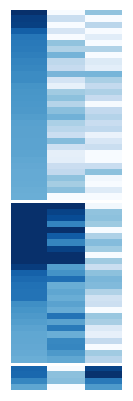

In [11]:
key = 'kupffer_trans_balb_filt_pval'
shared_set = df.reindex(set(nsg_dict[key]).intersection(f1_dict[key])).dropna().index.tolist()
f1_only = df.reindex(set(f1_dict[key]).difference(nsg_dict[key])).dropna().index.tolist()
nsg_only = df.reindex(set(nsg_dict[key]).difference(f1_dict[key])).dropna().index.tolist()

sets = [shared_set, f1_only, nsg_only]
set_lengths = [len(i) for i in sets]

f, axs = plt.subplots(3, 1, figsize=(2,7), gridspec_kw={'height_ratios': set_lengths})
plt.subplots_adjust(hspace=0.025)
for geneset, ax in zip(sets, axs):
    print(len(geneset))
    sns.heatmap(-df.loc[geneset, log2fc_cols].sort_values('log2FoldChange', ascending=True),
                cmap='Blues',
                # linewidth=1,
                # linecolor='k',
                # z_score=2,
                vmin=0,
                vmax=2,
                # annot=True,
                fmt='.1f',
                xticklabels=0,
                yticklabels=0,
                cbar=False,
                cbar_kws={'orientation':'horizontal',
                          'pad':0.05,
                          'label':'-log2fc'},
                ax=ax)

Labeled

31
26
4


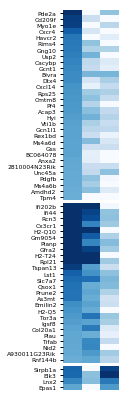

In [12]:
key = 'kupffer_trans_balb_filt_pval'
shared_set = df.reindex(set(nsg_dict[key]).intersection(f1_dict[key])).dropna().index.tolist()
f1_only = df.reindex(set(f1_dict[key]).difference(nsg_dict[key])).dropna().index.tolist()
nsg_only = df.reindex(set(nsg_dict[key]).difference(f1_dict[key])).dropna().index.tolist()

sets = [shared_set, f1_only, nsg_only]
set_lengths = [len(i) for i in sets]

f, axs = plt.subplots(3, 1, figsize=(1,7), gridspec_kw={'height_ratios': set_lengths})
plt.subplots_adjust(hspace=0.025)
for geneset, ax in zip(sets, axs):
    print(len(geneset))
    sns.heatmap(-df.loc[geneset, log2fc_cols].sort_values('log2FoldChange', ascending=True),
                cmap='Blues',
                # linewidth=1,
                # linecolor='k',
                # z_score=2,
                vmin=0,
                vmax=2,
                # annot=True,
                fmt='.1f',
                xticklabels=0,
                yticklabels=1,
                cbar=False,
                cbar_kws={'orientation':'horizontal',
                          'pad':0.05,
                          'label':'-log2fc'},
                ax=ax)

### Make colorbars for use in illustrator

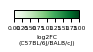

In [13]:
fig, ax = plt.subplots(figsize=(2,1))

cmap = matplotlib.cm.Greens
norm = matplotlib.colors.Normalize(vmin=0, vmax=2)
plt.gca().set_visible(False)
mapper = matplotlib.cm.ScalarMappable(norm=norm,  cmap=cmap)
mapper.set_array([])
cb = fig.colorbar(mapper,
                  use_gridspec=True,
                  orientation='horizontal',
                  label='log2FC\n(C57BL/6J/BALB/cJ)',
                  aspect=8)

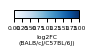

In [14]:
fig, ax = plt.subplots(figsize=(2,1))

cmap = matplotlib.cm.Blues
norm = matplotlib.colors.Normalize(vmin=0, vmax=2)
plt.gca().set_visible(False)
mapper = matplotlib.cm.ScalarMappable(norm=norm,  cmap=cmap)
mapper.set_array([])
cb = fig.colorbar(mapper,
                  use_gridspec=True,
                  orientation='horizontal',
                  label='log2FC\n(BALB/cJ/C57BL/6J)',
                  aspect=8)